In [2]:
'''Crea un tensor aleatorio de tamaño 3x3'''

import torch
import torch.nn as nn

x=torch.Tensor([[3,5,8],[9,4,2],[1,9,3]])
print(x.shape)
print(type(x))

torch.Size([3, 3])
<class 'torch.Tensor'>


In [3]:
'''Crea una red'''
Model=nn.Sequential(
    nn.Linear(4,10),
    nn.ReLU(),
    nn.Linear(10,2)
)

y=torch.rand(1,4)
print(y)

out=Model(y)
print(out)

tensor([[0.8468, 0.6243, 0.7645, 0.6401]])
tensor([[-0.1139,  0.1132]], grad_fn=<AddmmBackward0>)


In [4]:
'''Otra red'''
Model=nn.Sequential(
    nn.Linear(6,12),
    nn.Tanh(),
    nn.Linear(12,8),
    nn.ReLU(),
    nn.Linear(8,3)
)

x=torch.rand(2,6) #(batch_size, num_features)
out=Model(x)
print(out)

tensor([[ 0.1731,  0.5713, -0.3600],
        [ 0.1144,  0.3877, -0.2702]], grad_fn=<AddmmBackward0>)


In [5]:
'''Ejemplo mas complicado'''
Model=nn.Sequential(
    nn.Linear(5,16),
    nn.ReLU(),
    nn.Linear(16,8),
    nn.ReLU(),
    nn.Linear(8,4),
    nn.Tanh(),
    nn.Linear(4,3),
    nn.Softmax()
)

x=torch.rand(4,5)
out=Model(x)
print(out)

tensor([[0.2160, 0.4813, 0.3026],
        [0.2182, 0.4791, 0.3027],
        [0.2173, 0.4822, 0.3005],
        [0.2184, 0.4784, 0.3033]], grad_fn=<SoftmaxBackward0>)


C:\Users\Antonio Rojas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [6]:
'''Aplicar funciones'''

predic=torch.rand(5,3, requires_grad=True)
target=torch.rand(5,3)

print(predic)

criterion=nn.MSELoss()
loss=criterion(predic, target)


loss.backward()
print(predic.grad)

tensor([[0.6908, 0.1756, 0.2914],
        [0.0329, 0.7287, 0.3588],
        [0.2733, 0.7041, 0.4243],
        [0.8830, 0.7458, 0.8579],
        [0.2618, 0.7472, 0.3960]], requires_grad=True)
tensor([[ 0.0114,  0.0038, -0.0486],
        [-0.1237,  0.0178, -0.0228],
        [-0.0790,  0.0444, -0.0287],
        [ 0.0968,  0.0992,  0.0968],
        [-0.0602,  0.0330,  0.0121]])


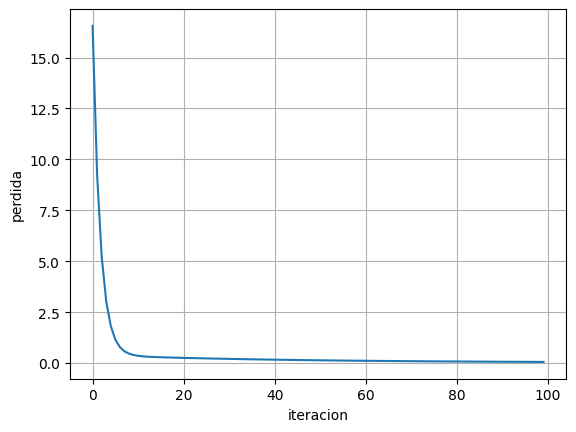

In [7]:
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt

X=torch.rand(100,1)
y=3*X + 2 + 0.5*torch.rand(100,1)

Model=nn.Linear(1,1)
criterion=nn.MSELoss()
optimizador=optim.SGD(Model.parameters(),lr=0.1)

losses=[]
for epoc in range(100):
    optimizador.zero_grad() #Pone en 0 los gradientes para que no se acumulen
    out=Model(X)  #Pasa los datos X al modelo
    loss=criterion(out, y) #evalua la perdida de los datos X respecto a los reales y, es un solo valor, ya que es la suma de las comparaciones de cada entrada
    loss.backward() #Calcula los gradientes
    optimizador.step() #Optimiza el modelo modificando los parametros
    losses.append(loss.item()) #Agraga la perdida de la iteracion a una lista

plt.plot(losses)
plt.grid()
plt.xlabel('iteracion')
plt.ylabel('perdida')
plt.show()



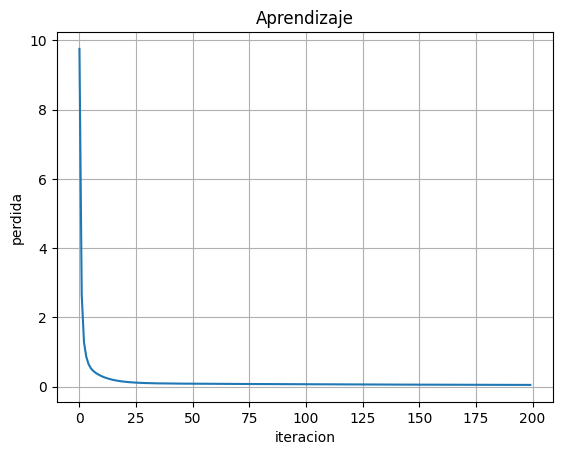

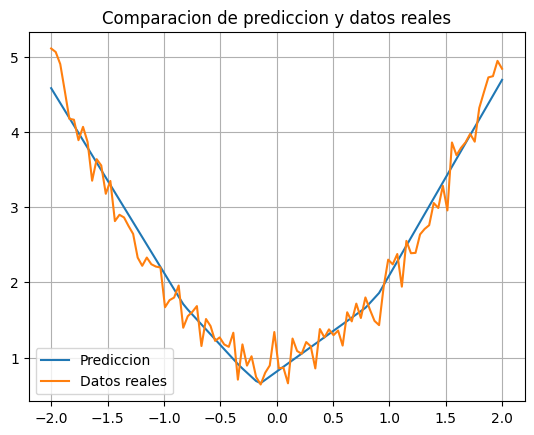

In [8]:
''' Ajuste de una relacion no lineal'''


x=torch.linspace(-2,2,100).reshape(-1,1)
y= x**2 + 1 + 0.2 * torch.randn(x.size())

Model=nn.Sequential(
    nn.Linear(1,10),
    nn.ReLU(),
    nn.Linear(10,1),
)


criterion=nn.MSELoss()
optimizer=optim.SGD(Model.parameters(), lr=0.1)


losses=[]
for epoca in range(200):
    optimizer.zero_grad()
    out=Model(x)
    loss=criterion(out, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())


plt.plot(losses)
plt.grid()
plt.xlabel('iteracion')
plt.ylabel('perdida')
plt.title('Aprendizaje')
plt.show()

plt.plot(x.numpy(),Model(x).detach().numpy(), label='Prediccion')
plt.plot(x.numpy(),y.numpy(), label='Datos reales')
plt.title('Comparacion de prediccion y datos reales')
plt.legend()
plt.grid()
plt.show()

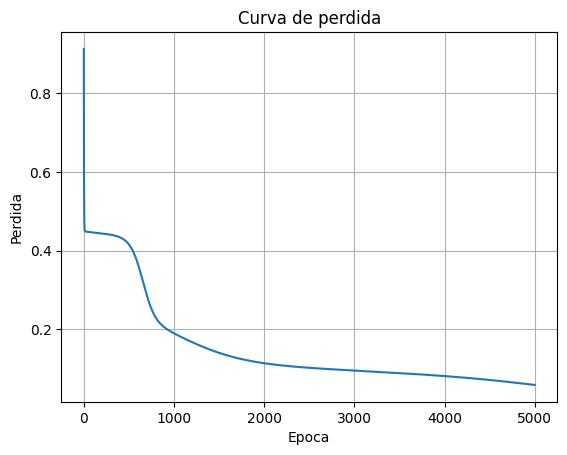

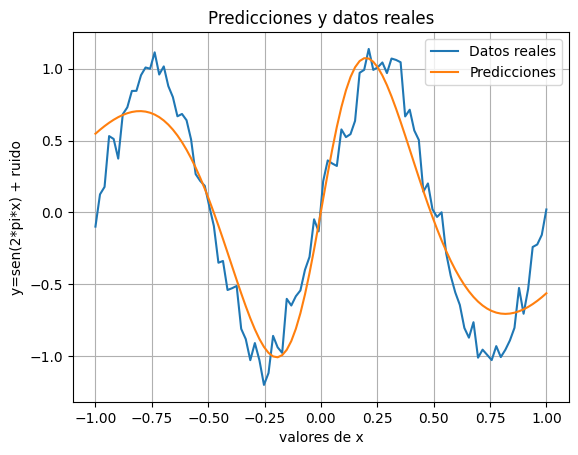

In [31]:
'''Aprender una función seno con una red neuronal'''

x=torch.linspace(-1,1,100).reshape(-1,1)
y=torch.sin(2*torch.pi*x) + 0.1*torch.randn(x.size())


Model=nn.Sequential(
    nn.Linear(1,20),
    nn.Tanh(),
    nn.Linear(20,1),
)

criterion=nn.MSELoss()
optimizer=optim.SGD(Model.parameters(), lr=0.1)


Losses=[]
for epoca in range(5000):
    optimizer.zero_grad()
    out=Model(x)
    loss=criterion(out, y)
    loss.backward()
    optimizer.step()
    Losses.append(loss.item())


#Grafica de perodida
plt.plot(Losses)
plt.title('Curva de perdida')
plt.xlabel('Epoca')
plt.ylabel('Perdida')
plt.grid()
plt.show()

#Comparacion de datos reales y predicciones
plt.plot(x.numpy(),y.numpy(), label='Datos reales')
plt.plot(x.numpy(), Model(x).detach().numpy(), label='Predicciones')
plt.legend()
plt.title('Predicciones y datos reales')
plt.xlabel('valores de x')
plt.ylabel('y=sen(2*pi*x) + ruido')
plt.grid()
plt.show()


